In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np

In [3]:
from sclibrary.io.network_reader import read_B1_B2
import pandas as pd

path = "data/lastfm-dataset-1K"
scbuilder, triangles = read_B1_B2(f"{path}/B1-artist.csv", f"{path}/B2t-artist.csv")
sc = scbuilder.to_simplicial_complex(triangles=triangles)

flow_path = f"{path}/flow-artist.csv"
flow = (
        pd.read_csv(flow_path, delimiter=",", header=None).to_numpy().flatten()
    )

print("flow", len(flow))

Num. of nodes: 657
Num. of edges: 1997
Num. of triangles: 1276
Shape: (657, 1997, 1276)
Max Dimension: 2
flow 1997


In [4]:
from sclibrary.filters import SimplicialTrendFilter

trend_fil = SimplicialTrendFilter(simplicial_complex=sc)

print("Divergence:", trend_fil.get_divergence_flow(flow))
print("Curl:", trend_fil.get_curl_flow(flow))

(CVXPY) May 29 10:32:44 PM: Encountered unexpected exception importing solver ECOS:
ImportError("dlopen(/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so, 0x0002): tried: '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (no such file), '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))")
(CVXPY) May 29 10:32:44 PM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/Users/irtaza

#### L2 regularizer

In [5]:

num_realizations = 50
snr_db = np.arange(-12, 12.5, 12)

trend_fil.denoising_l2_regularizer(flow=flow, component="divergence", 
                         num_realizations=num_realizations, snr_db=snr_db)

divergence_error_l2 = trend_fil.history["errors"]

SNR: 0.06309573444801933 dB - error noisy: 0.11780752535151597 - l2 error: 0.3027468673830755
SNR: 1.0 dB - error noisy: 0.011236111557413752 - l2 error: 0.019462909665933278
SNR: 15.848931924611133 dB - error noisy: 0.001413435853994329 - l2 error: 0.0029761318891310964


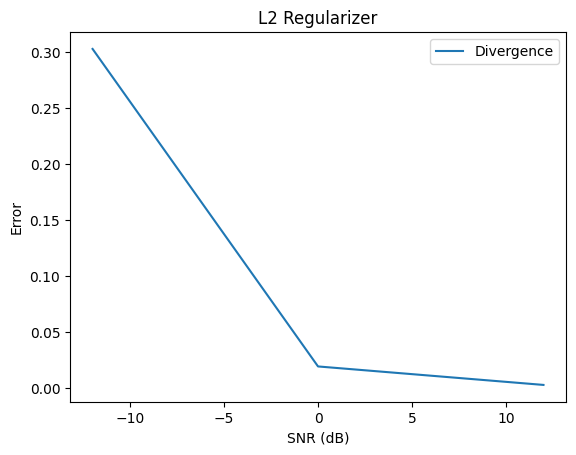

In [6]:
# plot error
import matplotlib.pyplot as plt
plt.plot(snr_db, divergence_error_l2, label="Divergence")
plt.xlabel("SNR (dB)")
plt.ylabel("Error")
plt.title("L2 Regularizer")
plt.legend()

#### L1 regularizer

In [8]:

num_realizations = 50
snr_db = np.arange(-12, 12.5, 12)

shift_operator = sc.incidence_matrix(rank=1)

trend_fil.denoising_l1_regularizer(flow=flow, shift_operator=shift_operator, component="divergence",
                                   num_realizations=num_realizations, snr_db=snr_db)

divergence_error_l1 = trend_fil.history["errors"]

SNR: 0.06309573444801933 dB - l1 error: 0.290699090737245
SNR: 1.0 dB - l1 error: 0.019820500066296983
SNR: 15.848931924611133 dB - l1 error: 0.003246372165465704


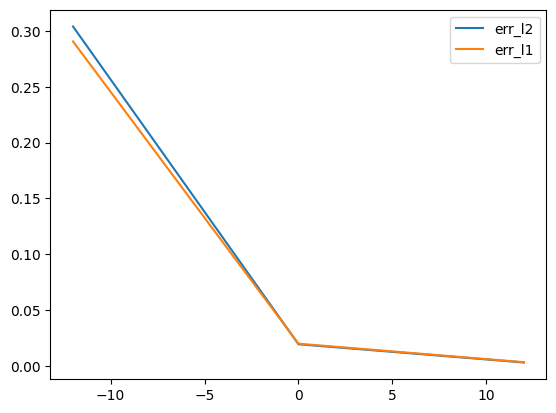

In [9]:
import matplotlib.pyplot as plt

plt.plot(snr_db, divergence_error_l2, label="err_l2")
plt.plot(snr_db, divergence_error_l1, label="err_l1")
plt.legend()